# 1. Exploratory Data Analysis

- **Column name**	Description
- **golden**	A boolean value indicating whether the tweet is a golden tweet or not. (Boolean)
- **_unit_state**	The state of the tweet (e.g. finalized, judged, etc.). (String)
- **_trusted_judgments**	The number of trusted judgments for the tweet. (Integer)
- **_last_judgment_at**	The date and time of the last judgment for the tweet. (DateTime)
- **choose_one**	The label assigned to the tweet (e.g. relevant, not relevant, etc.). (String)
- **choose_one_gold**	The gold label assigned to the tweet (e.g. relevant, not relevant, etc.). (String)
- **keyword**	The keyword associated with the tweet. (String)
- **location**	The location associated with the tweet. (String)
- **text**	The text content of the tweet. (String)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('socialmedia-disaster-tweets.csv', index_col=False, sep=",", header=0)

dataset

,index,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid
0,0,778243823,True,golden,156,NaN,Relevant,1.0000,Relevant,NaN,NaN,Just happened a terrible car crash,1.0,NaN
1,1,778243824,True,golden,152,NaN,Relevant,1.0000,Relevant,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,13.0,NaN
2,2,778243825,True,golden,137,NaN,Relevant,1.0000,Relevant,NaN,NaN,"Heard about #earthquake is different cities, s...",14.0,NaN
3,3,778243826,True,golden,136,NaN,Relevant,0.9603,Relevant,NaN,NaN,"there is a forest fire at spot pond, geese are...",15.0,NaN
4,4,778243827,True,golden,138,NaN,Relevant,1.0000,Relevant,NaN,NaN,Forest fire near La Ronge Sask. Canada,16.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10871,10871,778261105,True,golden,100,NaN,Relevant,0.7629,Relevant,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,5675678.0,NaN
10872,10872,778261106,True,golden,90,NaN,Relevant,0.9203,Relevant,NaN,NaN,Police investigating after an e-bike collided ...,4234.0,NaN
10873,10873,778261107,True,golden,102,NaN,Relevant,1.0000,Relevant,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,3242.0,NaN
10874,10874,778261108,True,golden,96,NaN,Relevant,0.8419,Relevant,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,457.0,NaN


/var/folders/5r/qt94qlfj34x9zlq_chxsrm5w0000gn/T/ipykernel_12342/3320944337.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset_corr = dataset.corr(method="pearson")


<Axes: >

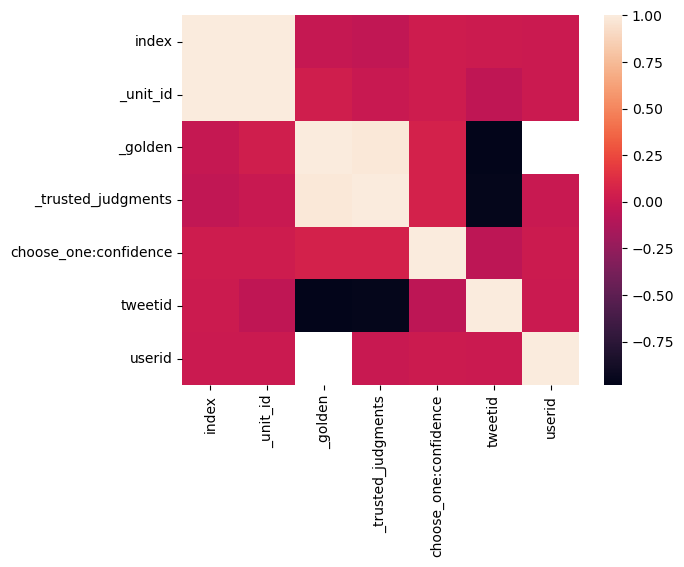

In [2]:
dataset_corr = dataset.corr(method="pearson")

sns.heatmap(dataset_corr)

## 1.1 Missing Data

In [3]:
missing_data = dataset.isnull().sum().to_frame()
missing_data = missing_data.rename(columns={0:'Empty Cells'})

print(missing_data)
print("The shape of dataset:", dataset.shape)

                       Empty Cells
index                            0
_unit_id                         0
_golden                          0
_unit_state                      0
_trusted_judgments               0
_last_judgment_at               84
choose_one                       0
choose_one:confidence            0
choose_one_gold              10789
keyword                         87
location                      3638
text                             0
tweetid                          0
userid                          87
The shape of dataset: (10876, 14)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'index'),
  Text(1, 0, '_unit_id'),
  Text(2, 0, '_golden'),
  Text(3, 0, '_unit_state'),
  Text(4, 0, '_trusted_judgments'),
  Text(5, 0, '_last_judgment_at'),
  Text(6, 0, 'choose_one'),
  Text(7, 0, 'choose_one:confidence'),
  Text(8, 0, 'choose_one_gold'),
  Text(9, 0, 'keyword'),
  Text(10, 0, 'location'),
  Text(11, 0, 'text'),
  Text(12, 0, 'tweetid'),
  Text(13, 0, 'userid')])

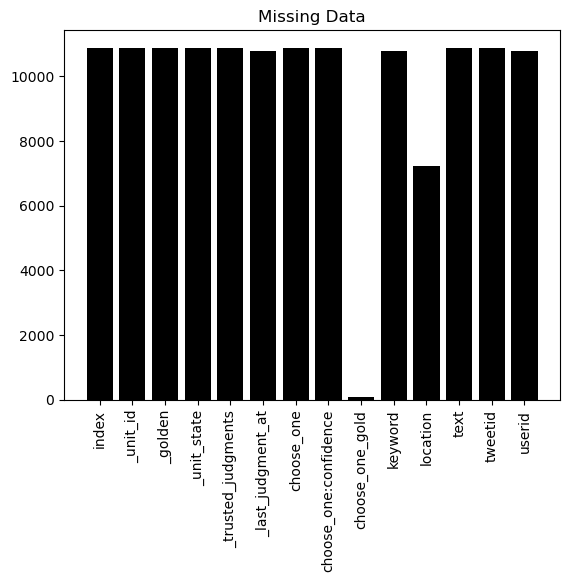

In [4]:
plt.bar(dataset.columns.values.tolist(), 10876-missing_data["Empty Cells"], color="black")

plt.title("Missing Data")

plt.xticks(rotation=90)

In [5]:
unknown_keyword = dataset[dataset["keyword"].isnull()]

unknown_keyword[["keyword", "userid", "_last_judgment_at"]]

,keyword,userid,_last_judgment_at
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
10871,NaN,NaN,NaN
10872,NaN,NaN,NaN
10873,NaN,NaN,NaN
10874,NaN,NaN,NaN


In [6]:
missing_keyword = dataset["keyword"].isnull()
missing_userid = dataset["userid"].isnull()
missing_last_judgment_at = dataset["_last_judgment_at"].isnull()

unknown_keyword_and_userid = dataset[missing_keyword & missing_userid]
unknown_keyword_and_last_judgment_at = dataset[missing_keyword & missing_last_judgment_at]

print("Number of tweets missing both 'keyword' and 'userid':", len(unknown_keyword_and_userid))
print("Number of tweets missing both 'keyword' and '_last_judgment_at':", len(unknown_keyword_and_last_judgment_at))

Number of tweets missing both 'keyword' and 'userid': 87
Number of tweets missing both 'keyword' and '_last_judgment_at': 84


Conclusion: most tweets that missing values in “keyword” column also missing the information of “userid” and “_last_judgment_at”, it is advisable to delete the 87 lines of data without enough information in order to improve the performance of model.

## 1.2 Useless Columns: index, unit_id, user_id, tweet_id & choose_one_gold

## 1.3 Meaningless Columns: golden, unit_state, trusted_judgments & last_judgment_at

<Axes: xlabel='_golden', ylabel='count'>

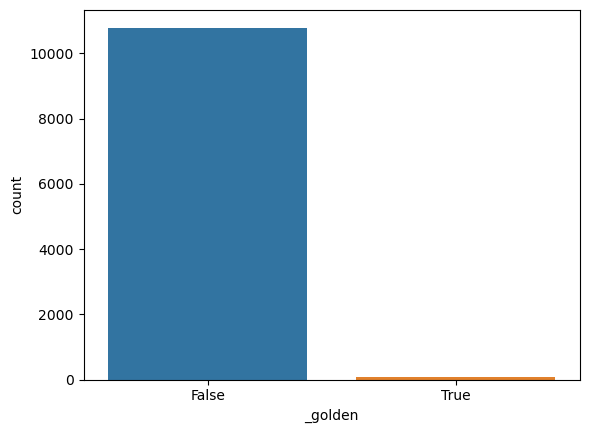

In [7]:
sns.countplot(x="_golden", data=dataset)

<Axes: xlabel='_unit_state', ylabel='count'>

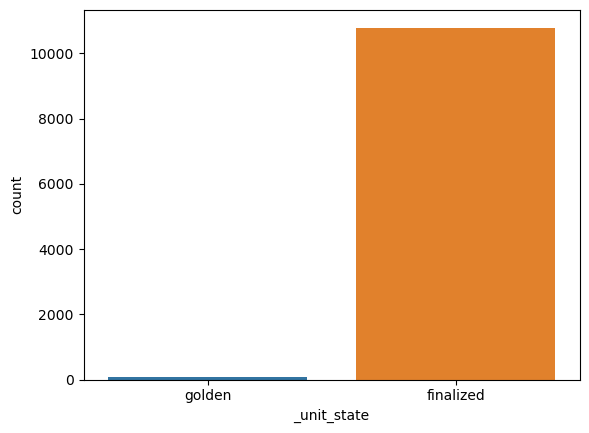

In [8]:
sns.countplot(x="_unit_state", data=dataset)

In [9]:
print("Value counts in 'golden':")
print(dataset["_golden"].value_counts())
print("\n")

print("Value counts in 'unit_state':")
print(dataset["_unit_state"].value_counts())
print("\n")

true_and_golden = dataset[(dataset["_golden"] == True) & (dataset["_unit_state"] == "golden")]
false_and_finalized = dataset[(dataset["_golden"] == False) & (dataset["_unit_state"] == "finalized")]

print("Number of tweets that 'golden' is True and 'unit_state' is golden:", len(true_and_golden))
print("Number of tweets that 'golden' is False and 'unit_state' is finalized:", len(false_and_finalized))

Value counts in 'golden':
False    10792
True        84
Name: _golden, dtype: int64


Value counts in 'unit_state':
finalized    10789
golden          87
Name: _unit_state, dtype: int64


Number of tweets that 'golden' is True and 'unit_state' is golden: 84
Number of tweets that 'golden' is False and 'unit_state' is finalized: 10789


<Axes: xlabel='_trusted_judgments', ylabel='Density'>

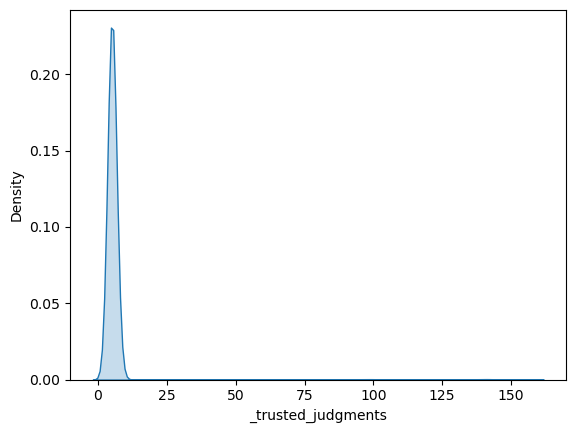

In [10]:
sns.kdeplot(dataset["_trusted_judgments"], fill=True)

In [11]:
print("Value counts in 'trusted_judgments':")
print(dataset["_trusted_judgments"].value_counts()[0:15])
print("Maximum in 'trusted_judgments':", dataset["_trusted_judgments"].max())
print("Minimum in 'trusted_judgments':", dataset["_trusted_judgments"].min())

Value counts in 'trusted_judgments':
5      9833
6       698
7       217
8        41
99        8
147       5
102       5
96        5
136       4
143       4
151       4
142       4
140       4
138       3
141       3
Name: _trusted_judgments, dtype: int64
Maximum in 'trusted_judgments': 157
Minimum in 'trusted_judgments': 3


<Axes: xlabel='_last_judgment_at', ylabel='Density'>

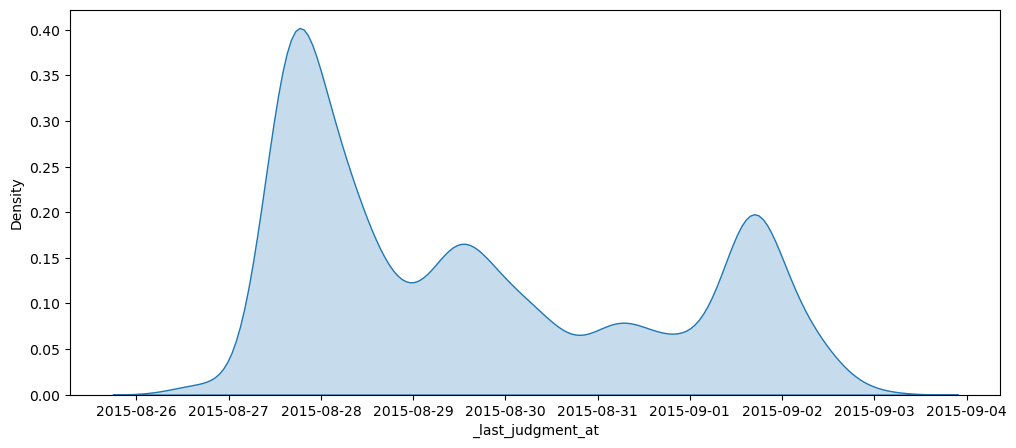

In [12]:
last_judgment_at = pd.to_datetime(dataset["_last_judgment_at"])

plt.figure(figsize=(12, 5))

sns.kdeplot(last_judgment_at, fill=True)

## 1.4 Other Columns: choose_one, choose_one:confidence & location

<Axes: xlabel='choose_one', ylabel='count'>

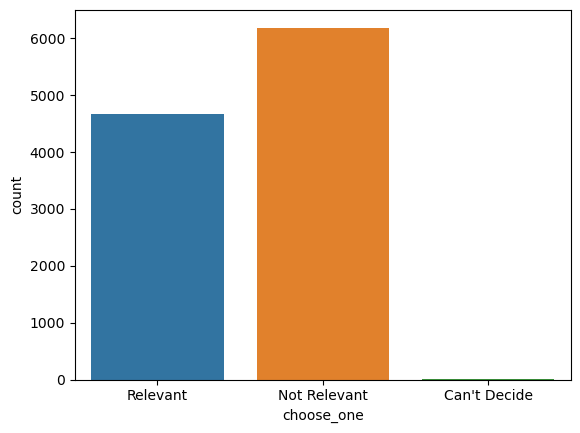

In [13]:
sns.countplot(x="choose_one", data=dataset)

In [14]:
print("Value counts in 'choose_one':")
print(dataset["choose_one"].value_counts())

Value counts in 'choose_one':
Not Relevant    6187
Relevant        4673
Can't Decide      16
Name: choose_one, dtype: int64


<Axes: xlabel='choose_one:confidence', ylabel='Density'>

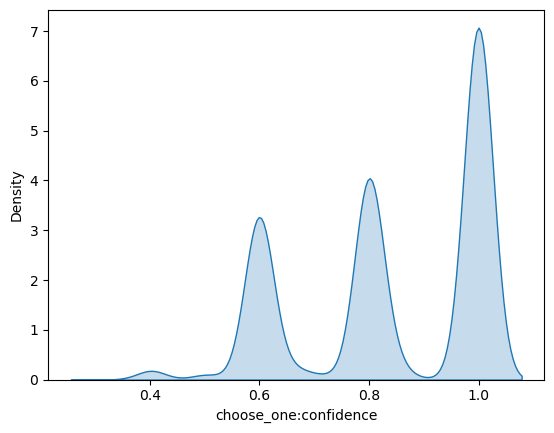

In [15]:
sns.kdeplot(dataset["choose_one:confidence"], fill=True)

In [16]:
print("Value counts in 'choose_one:confidence':")
print(dataset["choose_one:confidence"].value_counts())
print("Maximum in 'choose_one:confidence':", dataset["choose_one:confidence"].max())
print("Minimum in 'choose_one:confidence':", dataset["choose_one:confidence"].min())

Value counts in 'choose_one:confidence':
1.0000    5046
0.8000     203
0.6006     187
0.7982     185
0.7994     183
          ... 
0.7505       1
0.8335       1
0.8538       1
0.6629       1
0.8812       1
Name: choose_one:confidence, Length: 463, dtype: int64
Maximum in 'choose_one:confidence': 1.0
Minimum in 'choose_one:confidence': 0.3342


In [17]:
dataset["location"].value_counts()

USA                         141
New York                    109
United States                65
London                       58
Canada                       42
                           ... 
ÌÏT: 19.123127,72.825133      1
Piedmont, CA                  1
The Interwebs!                1
denver colorado               1
Lincoln                       1
Name: location, Length: 4521, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'USA'),
  Text(1, 0, 'New York'),
  Text(2, 0, 'United States'),
  Text(3, 0, 'London'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'Nigeria'),
  Text(6, 0, 'India'),
  Text(7, 0, 'Worldwide'),
  Text(8, 0, 'Los Angeles, CA'),
  Text(9, 0, 'UK'),
  Text(10, 0, 'Kenya'),
  Text(11, 0, 'Washington, DC'),
  Text(12, 0, 'Mumbai'),
  Text(13, 0, 'United Kingdom'),
  Text(14, 0, 'Australia'),
  Text(15, 0, 'California'),
  Text(16, 0, 'Los Angeles'),
  Text(17, 0, 'San Francisco'),
  Text(18, 0, 'Chicago, IL'),
  Text(19, 0, 'New York, NY'),
  Text(20, 0, 'NYC'),
  Text(21, 0, 'California, USA'),
  Text(22, 0, 'Florida'),
  Text(23, 0, 'San Francisco, CA'),
  Text(24, 0, 'Chicago'),
  Text(25, 0, 'Toronto'),
  Text(26, 0, 'Washington, D.C.'),
  Text(27, 0, 'Ireland'),
  Text(28, 0, 'Indonesia'),
  Text(29, 0, 'Everywhere')])

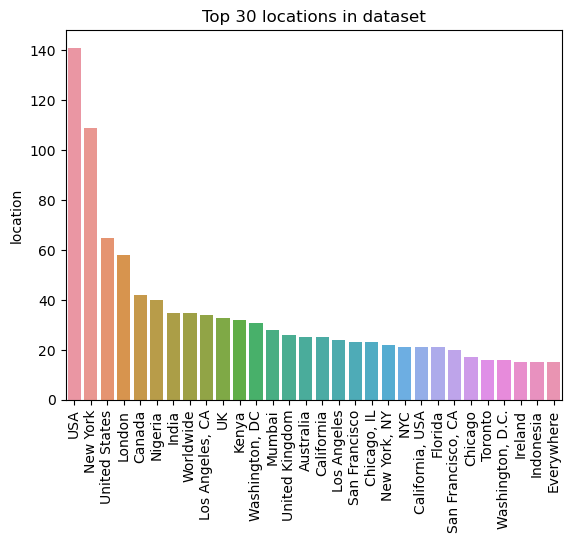

In [18]:
location = dataset["location"].value_counts()[0:30]

sns.barplot(x=location.index, y=location)

plt.title("Top 30 locations in dataset")

plt.xticks(rotation=90)

## 1.5 Key Columns: Text & Keyword

In [19]:
print(dataset["text"])

0                       Just happened a terrible car crash
1        Our Deeds are the Reason of this #earthquake M...
2        Heard about #earthquake is different cities, s...
3        there is a forest fire at spot pond, geese are...
4                   Forest fire near La Ronge Sask. Canada
                               ...                        
10871    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
10872    Police investigating after an e-bike collided ...
10873    The Latest: More Homes Razed by Northern Calif...
10874    MEG issues Hazardous Weather Outlook (HWO) htt...
10875    #CityofCalgary has activated its Municipal Eme...
Name: text, Length: 10876, dtype: object


In [20]:
print(dataset["keyword"].unique())
print("The number of unique keyword:", len(dataset["keyword"].unique()))

[nan 'ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'
 'body%20bags' 'bomb' 'bombed' 'bombing' 'bridge%20collapse'
 'buildings%20burning' 'buildings%20on%20fire' 'burned' 'burning'
 'burning%20buildings' 'bush%20fires' 'casualties' 'casualty'
 'catastrophe' 'catastrophic' 'chemical%20emergency' 'cliff%20fall'
 'collapse' 'collapsed' 'collide' 'collided' 'collision' 'crash' 'crashed'
 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger' 'dead' 'death'
 'deaths' 'debris' 'deluge' 'deluged' 'demolish' 'demolished' 'demolition'
 'derail' 'derailed' 'derailment' 'desolate' 'desolation' 'destroy'
 'destroyed' 'destruction' 'detonate' 'detonation' 'devastated'
 'devastation' 'disaster' 'displaced' 'droug

In [21]:
print(dataset["keyword"].value_counts())

ablaze                   50
lava                     50
loud%20bang              50
mass%20murder            50
massacre                 50
                         ..
forest%20fire            24
threat                   16
radiation%20emergency    14
inundation               14
epicentre                13
Name: keyword, Length: 221, dtype: int64
